<a href="https://colab.research.google.com/github/Valejbk/AnalisisTiendasRMP/blob/main/optimizaci%C3%B3n_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando los datos**

In [1]:
#importamos pandas
#leemos el archivo copiando la ruta
#revisamos el contenido general del archivo, del conjunto de datos: 71.175 filas y 11 columnas

import pandas as pd

datos = pd.read_csv('/content/flights.csv')

datos.shape


(71175, 11)

In [2]:
#veremos con más detalle las primeras 5 filas
#el horario está en minutos y segundos. En el caso del primer vuelo (26) el delay es de 70 minutos y 12 segundos
#los 12 segundos se obtienen de multiplicar .20 x 60 (cantidad de segundo q' tiene 1 minuto)


datos.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [3]:
#redondeamos

round(.20 * 60)


12

In [4]:
#ahora vamos a los metadatos con .info, son los datos acerca de los datos

datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
#vamos más allá en el análisis exploratorio y ver la estadística de los valores (cuartiles, mínimo, máximo, promedio, etc.)
#desde ya nos interesa la variable respuesta (que es el retraso o delay)
#el conteo de los valores oara todos es 71.175
#el promedio de retraso es 12 minutos con app. 30 segundos
#el desvío estándar (variación que puede haber) es de 23 minutos, que es mucho (margen muy amplio con respecto al promedio)
#valor mínimo de retraso y valor máximo de retraso
#el valor negativo de -41.02 significa que hay 1 vuelo entre los 71.175 que salió 41 minutos adelantado
#en el primer cuartil, o sea, hasta el 25% de los vuelos han salido 4 minutos y algo adelantados
# en el segundo cuartil, hasta la mediana, 50% de los vuelos han salido con 9 minutos y 45 segundos de retraso
#en el tercer cuartil, 75% de los vuelos han salido con retraso de 27 minutos y 40 segundos
#valor máximo de atraso de más de 125 minutos (2 horas)

datos.describe()   #vemos las variables numéricas


,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
#debemos ver cómo se comporta el retraso de los vuelos
#generar un modelo de aprendizaje de máquina con los recursos de la biblioteca Scikit Learn y poder prevenir situaciones
#con 1 margen de error queremos acercarnos lo m,áximo posible a la demora de 1 vuelo y generar planes en torno a eso (estacionamientos, taxis, etc.)



In [7]:
#también podemos leer las variables categóricas
#columna 1: 3 aerolíneas; la top es BZ; su frecuencia es=47.598
#columna 2: 6 tipos distintos de avión; el top es el Airbus A320; frecuencia 30.778
#columna 3: schengen (sí, no (2)); schengen es top; frecuencia 42.569
#columna 4: 10 aeropuertos de origen; el top es TZF; frecuencia 14.162

datos.describe(include= 'O')


,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [8]:
#hecho el análisis exploratorio, toca el análisis visual
#interesa especial%, atrasos de vuelos respecto a las aerolíneas y n° de vuelos por cada aerolínea

import seaborn as sns
import matplotlib.pyplot as plt


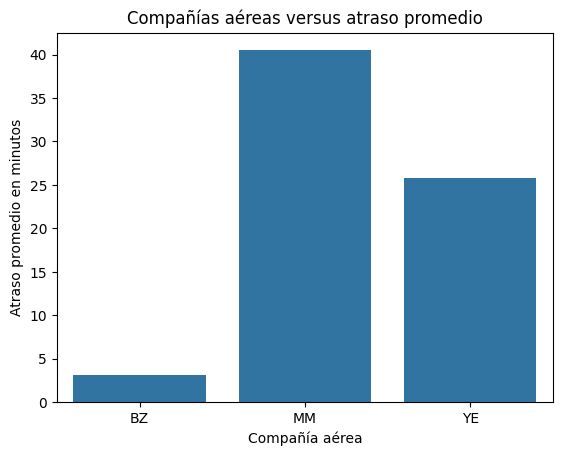

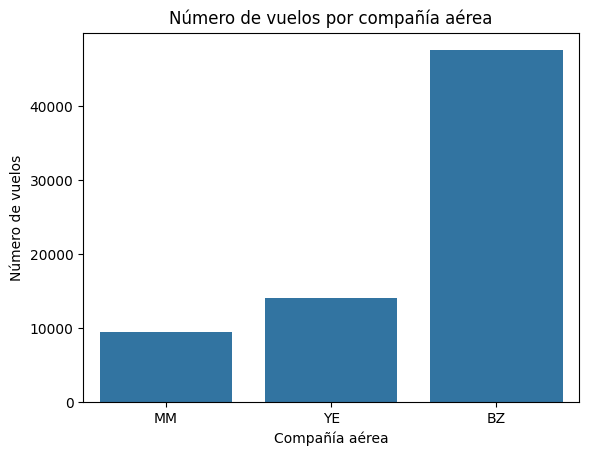

In [9]:
#avg---> average
#groupby para agrupar por aerolínea
#'delay' porq' nos interesa el retraso. Es la variable respuesta y va entre []
#mean() para el promedio (porque estamos agregando elementos y se necesita una función que trabaje con los datos en vista a 1 objetivo)
#reset_index para dejarlo como columna (si no lo hacemos, va a quedar como índice)
#gráfico con sns; título con plt.title; etiquetas con plt.xlabel y plt.ylabel
#aprovechamos y haremos un gráfico que nos muestre el N° DE VUELOS POR COMPAÑÍA AÉREA---> COUNTPLOT

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()

sns.barplot(x= 'airline', y= 'delay', data= avg_delay)
plt.title('Compañías aéreas versus atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')

plt.show()


sns.countplot(data= datos, x= 'airline')
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')

plt.show()


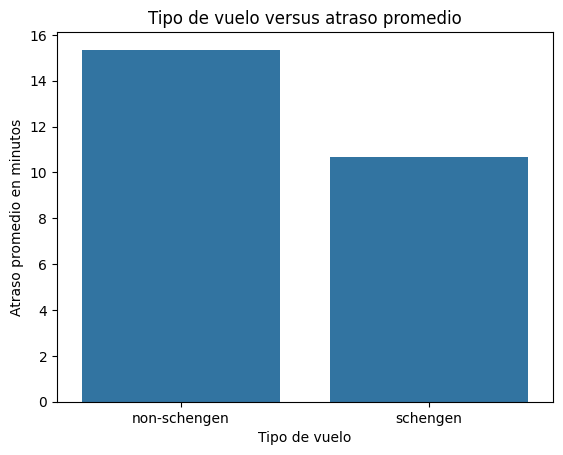

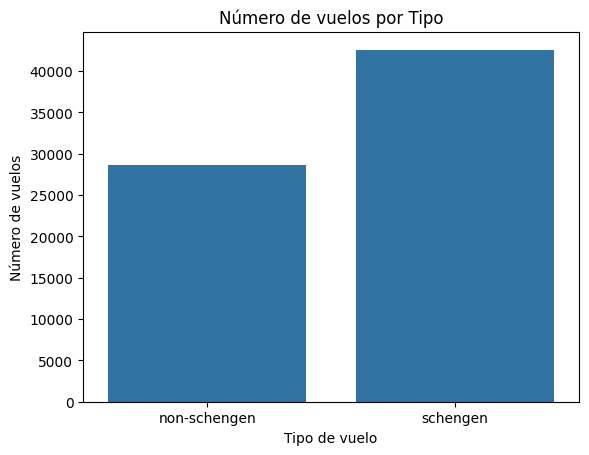

In [10]:



avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x= 'schengen', y= 'delay', data= avg_delay)
plt.title('Tipo de vuelo versus atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')

plt.show()


sns.countplot(data= datos, x= 'schengen')
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')

plt.show()



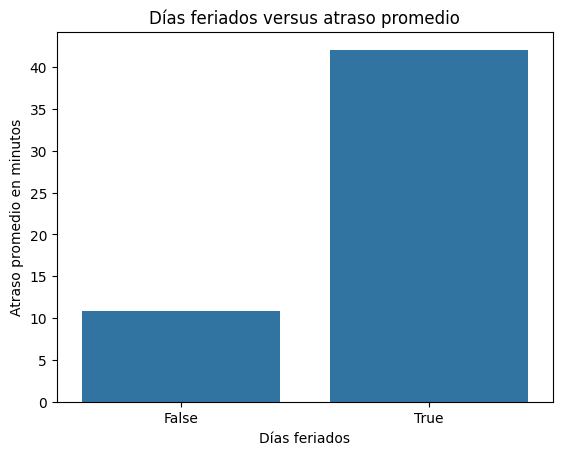

In [11]:
#días feriados is_holiday

avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(x= 'is_holiday', y= 'delay', data= avg_delay)
plt.title('Días feriados versus atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')

plt.show()


In [12]:
#veamos qué devuelve exactamente la primera parte del código que trabaja con la columna aircraft_type

datos['aircraft_type'].value_counts().index


Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

In [13]:
#para ver que los entrega ordenados por cantidad (de > a <)

datos['aircraft_type'].value_counts()


,count
aircraft_type,
Airbus A320,30778
Airbus A330,16654
Boeing 787,9606
Embraer E175,7098
Boeing 737,4722
Boeing 777,2317


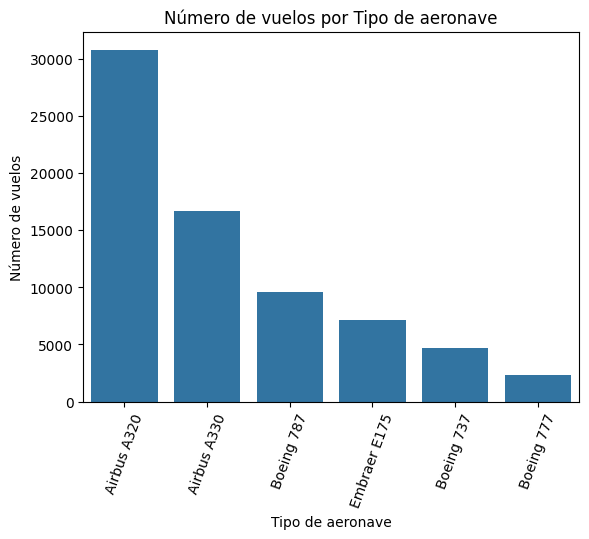

In [14]:
#cantidad de aviones que circulan en el aeropuerto
#tenemos que tomar 1° la cantidad de aviones con countplot
#order = order (que acabamos de hacer)
#rotation porq' los nombres de los aviones son largos

order = datos['aircraft_type'].value_counts().index

sns.countplot(data= datos, x= 'aircraft_type', order= order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation= 70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')

plt.show()



## **Distribución de los datos**

<Axes: xlabel='arrival_time', ylabel='Count'>

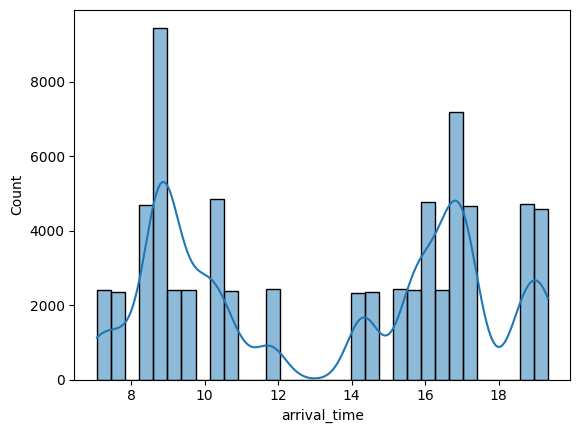

In [15]:
#concepto de histograma (histplot) q' permite analizar la frecuencia de nuestros diferentes valores
#tópicos: horario salida vueos, horario llegada, retraso en minutos
#la data va a ser "datos"; tiempo de arribo (arrival_time); curva de densidad=True (Kde=)


sns.histplot(data= datos, x= 'arrival_time', kde= True)



In [16]:
#fórmula numpy, creamos 1 función que ayuda a establecer el rango intercuartil y el ancho de los bins
#cargamos con play

import numpy as np

def ancho_bin(df, columna):
   q75, q25 = np.percentile(df[columna], [75, 25])
   iqr = q75 - q25

   ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
   return ancho



<Axes: xlabel='arrival_time', ylabel='Count'>

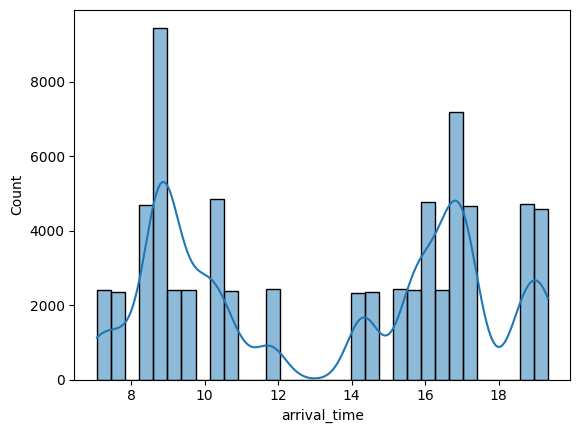

In [17]:
#creamos 1 variable que llamaremos binwidth para establecer el ancho del bin
#usamos los 2 parámetros: 1)conjunto de datos y 2)nombre columna (arrival_time)
#traemos nuevamente el código


binwidth = ancho_bin(datos, 'arrival_time')
sns.histplot(data= datos, x= 'arrival_time', kde= True, binwidth= binwidth)



<Axes: xlabel='departure_time', ylabel='Count'>

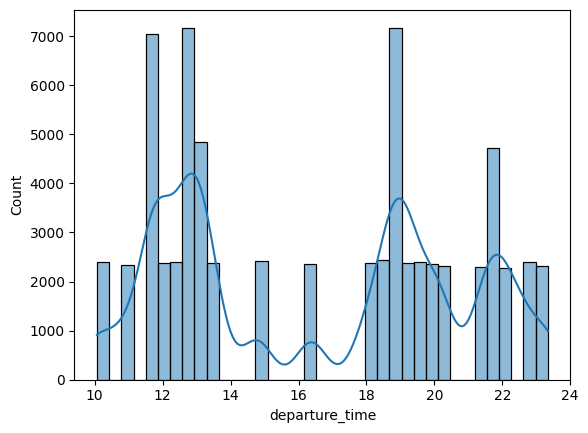

In [18]:
#ahora lo mismo para el horario de salida

binwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data= datos, x= 'departure_time', kde= True, binwidth= binwidth)



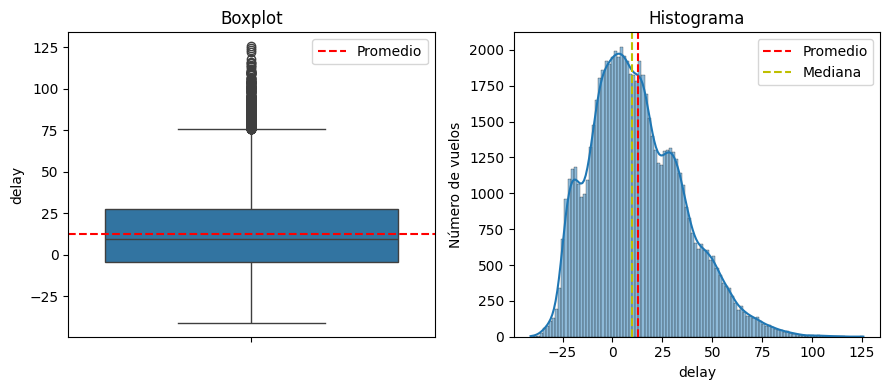

In [19]:
#ahora lo importante---> horario de retraso ---> gráfico distribución variable respuesta
#generamos la variable atraso promedio y atraso_mediana
#la idea es trabajar con el gráfico boxplot e histograma


atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

#1° el lienzo con 2 gráficas, lado a lado
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data= datos, y= 'delay', ax= ax[0]) # a la izquierda
ax[0].set_title('Boxplot')
#añadiremos 1 línea horizontal para indicar el promedio
ax[0].axhline(y= atraso_promedio, color= 'r', linestyle= '--', label= 'Promedio') #línea horizontal, cortando el eje y
ax[0].legend()


binwidth = ancho_bin(datos, 'delay')
sns.histplot(data= datos, x= 'delay', ax= ax[1], kde= True, binwidth= binwidth) # a la derecha
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')

#vamos a generar 2 líneas verticales, 1 para el promedio y potra para la mediana (ax[1] es el lado derecho)
ax[1].axvline(x= atraso_promedio, color= 'r', linestyle= '--', label= 'Promedio')
ax[1].axvline(x= atraso_mediana, color= 'y', linestyle= '--', label= 'Mediana')
ax[1].legend()

#para evitar que los gráficos se solapen
plt.tight_layout()

plt.show()



In [20]:
#en el boxplot:
#la mediana está como en 10 minutos---> recordemos la tabla que arrojó datos.describe (muy parecidos los datos)
#el promedio está en 12,5 ó 13 minutos---> recordemos datos.describe
#el tiempo de atraso que está considerando el boxplot es hasta 75 minutos. Lo demás es outliers u observaciones atípicas
#el mínimo está en negativo porq' son los 44 minutos de adelanto del vuelo


#en el histograma:
#el promedio y la mediana se encuentran cerca, lo que indica una distribución aproximada a la normal



# **Feature engineering**

In [21]:
#tenemos 1 visión global del conjunto de datos, dejaremos 1 momento de lado la variable respuesta
#la variable respuesta está distribuida de manera q' podemos usarla directa% en 1 modelo machine learning
#vamos a generar nuevas features, atributos---> features engineering (ingeniería de atributos)
#recordemos las columnas de nuestro DataFrame y vemos DÍA y AÑO

datos.columns


Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [22]:
#podríamos crear al columna fecha a partir de estas 2 columnas... Ambos son ENTEROS
#en datos.describe aparece el valor de day mínimo= 0 y máximo 364 y el valor year mínimo= 2010 y máximo= 2022
#en el DataFrame datos, crearemos 1 columna datos
#año lo convertimos a string, lo concatenamos con un guión (+ '-' +) con el día PERO no puede comenzar de 0 (sumamos 1)

#datos = datos.drop('datos', axis= 1)
datos['date'] = datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str)

datos.head(2)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-1
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-1


In [23]:
#solucionado el problema datos/date podemos tomar esta columna
#aplicamos pd.to_datetime para convertir los valores a objetos de tipo fecha y hora, necesario para trabajar con datos de series temporales
#así podemos realizar análisis relacionados con fechas y horas
#formato %Y-%j convierte el día 1 en el 1° de Enero y, por defecto, el día 365 en el 31 de Diciembre

datos['date'] = datos['year'].astype(str) + '-' + (datos['day'] + 1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')

datos.tail(2)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [24]:
#ahora crearemos 1 columna que diga si es fin de semana
#la columna será 'is_weekend, sobre la columna 'date'... Aplicamos el método de datetime (dt): weekday/ isin
#contamos desde 0 por lo q' 5 es Sábado y 6 es Domingo
#complementamos con la variable day_name para que devuelva el día de la semana, igual con datetime

datos['is_weekend'] = datos['date'].dt.weekday.isin([5, 6])
datos['day_name'] = datos['date'].dt.day_name()

datos.sample(5)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
22075,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,11,2014,False,35.681478,2014-01-12,True,Sunday
38742,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,27,2017,False,16.771652,2017-01-28,True,Saturday
13152,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,146,2012,False,48.676766,2012-05-26,True,Saturday
55155,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,27,2020,False,-14.969152,2020-01-28,False,Tuesday
25732,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,255,2014,False,36.058184,2014-09-13,True,Saturday


In [25]:
#si revisamos nos quedan variables categóricas que debemos codificar---> VARIABLES NUMÉRICAS
#aún tenemos cadenas de caracteres y variables booleanas
#revisemos new% con datos.info()


datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [26]:
#OJOOO... como python es 1 lenguaje de código abierto, se actualiza constant%, por eso aparecen advertencias
#por ahora las vamos a ignorar... cargamos con play

import warnings

warnings.filterwarnings('ignore')


In [27]:
#schengen--->referido al espacio aéreo y los permisos
#replace tiene () y dentro va el diccionario

datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1})
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1})
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1})

datos.sample(3)


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
6608,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,75,2011,0,-9.874229,2011-03-17,0,Thursday
26293,6,YE,Boeing 787,1,AUZ,17.033688,19.033688,292,2014,0,21.389384,2014-10-20,0,Monday
11646,13,BZ,Boeing 787,0,TCY,10.172731,13.172731,46,2012,0,-25.928654,2012-02-16,0,Thursday


In [28]:
#aún quedan 4 variables object (airline, aircraft_type, origin y day_name)
#la nueva variable es categoricas (en lista)
#usamos 1 método de pandas que nos permite codificar las variables: get_dummies
#así como está, para VISUALIZAR porq' debemos ordenar

categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

pd.get_dummies(data= datos, columns= categoricas, dtype= int).head()


,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
#creamos 1 nueva variable llamada datos codificados
#categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']
#y quedamos listos para la limpieza

datos_codificados = pd.get_dummies(data= datos, columns= categoricas, dtype= int)
datos_codificados.sample(5)


,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
68535,10,0,8.939996,11.939996,189,2022,0,42.006219,2022-07-09,1,...,1,0,0,0,0,1,0,0,0,0
60164,13,0,10.172731,13.172731,360,2020,0,-20.731630,2020-12-26,1,...,1,0,0,0,0,1,0,0,0,0
52675,26,0,8.885071,10.885071,226,2019,1,58.578848,2019-08-15,0,...,1,0,0,0,0,0,0,1,0,0
35770,21,1,7.065594,10.065594,194,2016,0,21.537211,2016-07-13,0,...,0,0,0,0,0,0,0,0,0,1
36345,3,1,18.635384,22.635384,233,2016,0,-17.895414,2016-08-21,1,...,0,1,0,0,0,0,1,0,0,0


## **Limpiando los datos**

In [30]:
#profe indica que horario de llegada y de salida tienen comportamientos semejantes y queremos validar matemát% lo que afirmamos
#pandas tiene el método de las CORRELACIONES y lo aplicaremos a arrival_time y departure_time
#el MAPA DE CORRELACIÓN nos dice cómo 1 o varias variables se relacionan con otras y varía de -1 a 1. Negativas de -1 a 0 y positivas de 0 a 1
#Correlaciones negativas---> la variación es inversa% proporcional (1 crece, la otra disminuye en la misma proporción) Ej.: >demora en despegar < satisfacc. clientes
#Correlaciones positivas---> la variación es proporcional en 1 mismo sentido (ambass crecen o decrecen proporcional%) Ej.: < retraso preparac. avión, < demora en abordar
#MATEMÁTICAMENTE SON MUY PARECIDAS, CORRELACIÓN DE CASI 100%, como es muy fuerte, debemos escoger sólo 1 para que no produzcan un SESGO en el modelo


datos[['arrival_time', 'departure_time']].corr()




,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [31]:
#eliminaremos columnas entonces, incluidas las que ya no nos sirven y la de identificación, porq' no aporta ningún patrón
#creamos 1 nueva variable= df, de datos_codificados eliminamos con drop---> columnas que detallamos en 1 lista


df = datos_codificados.drop(columns= ['flight_id', 'date', 'day', 'year', 'departure_time'])

df.sample(10)


,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
70580,1,7.708301,0,-18.654279,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
32014,0,10.177197,0,-0.399474,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
22491,1,8.923441,0,-9.734271,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20899,0,15.967963,1,14.681858,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
42386,1,7.065594,0,7.224186,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
39500,0,17.041281,0,48.542169,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
52143,0,10.172731,1,24.710277,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
52572,1,14.258911,0,-13.084567,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3010,0,8.885071,0,29.376662,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
69126,1,8.564949,1,51.641987,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [32]:
#usando OneHotEncoder de sklearn


#categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
#df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
#df_encoded.head()


In [32]:
#from sklearn.metrics import mean_absolute_error
#from sklearn.linear_model import LinearRegression

# **Selección y validación del modelo**

In [33]:
#el DataFrame está total% tratado para el modelado con machien learning  pero, necesitamos:
# 1°.- establecer 1 línea base o referencia---> BASELINE
#      es el punto de partida y debemos mejorarla, compararemos todo el modelado con ella
# 2°.- usaremos la biblioteca scikit-learn.org/stable/
#estamos trabajando con regresión y existen diversos tipos de modelos de regresión (clasificación, clustering (equipamiento) y selección de modelos)
#para la BaseLine podemos crear 1 modelo dummy (básico), que no generaliza muy bien---> usamos el DummyRegressor (regresión básica)
#también usaremos train_test_split, que separa el DataFrame en datos de entrenamiento y datos de prueba
# X será nuestra variable independiente que tendrá todas las columnas, menos 'delay'
# y será la variable que contiene 'delay'


from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X = df.drop(columns= ['delay'], axis= 1)
y = df['delay']


#vamos a segregar el modelo, 30% de prueba y un estado de pseudoaleatoriedad de 42 (puede ser cualquier n°)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)


#crearemos el modelo de Baseline con DummyRegressor y ajustamos los datos con .fit para entrenarlo

baseline = DummyRegressor()
baseline.fit(X_train, y_train)



DummyRegressor()

In [37]:
#ahora vamos a evaluarlo y como se trata de un problema de regresión, usamos mean_squared_error
#las métricas permitirán medir el error del modelo
#el coeficiente de determinación (r2_score) es importantísimo ya que indica qué tanto las variables independientes logran explicar la variable respuesta
#no deneríamos esperar mucho de nuestro dummyregressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#ahora, hacemos la predicción

y_pred_dummy = baseline.predict(X_test)

#definimos la función y ella recibe los valores reales y los valores predichos
#creamos un diccionario llamado métricas con llave y valor... ******OJO el profe estableció 4 casillas decimales para cada 1

def calcular_regresion(y_test, y_pred):
   rmse = mean_squared_error(y_test, y_pred)
   mae = mean_absolute_error(y_test, y_pred)
   r2 = r2_score(y_test, y_pred)

   metricas = {
      'RMSE': round(rmse**(1/2), 4),
      'MAE': round(mae, 4),
      'R2': round(r2, 4)
   }

   return metricas


#hicimos cambios porq' mean_squared_error ya no reconoce squared al final, así que lo sacamos
#entonces, en 'RMSE' tenemos que hacer **---> eleva el elemento de la izq. (rmse) a la potencia del número de la derecha (1/2)


In [38]:
#generamos 1 variable llamada resultados_baseline, usamos calcular regresión y recibe la y de prueba y el valor de nuestro dummy regresor
#resultados:
#           la raíz cuadrada del error es 23.16 minutos
#           el error absoluto medio es 18.56 minutos
#           el coeficiente de determinación es 0...
#por tanto, el modelo NO está generalizando de manera correcta
#recoordemos que esta es nuestra línea base y a partir de aquí se comparan los modelos mejorados

resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline


{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

## **Entrenando con bosques aleatorios**

In [39]:
#usamos randomforestregressor, con parámetro profundidad que debemos ajustar y valor semilla = 42 (como e° de pseudoaleatoriedad)
#se crean varios árboles de decisión y encuentra la mejor combinac. (de árb de decis.) para lograr el mejor resultado al hacer 1 previsión, aquí: RETRASOS
#RMSE mejoró de 23 min. a 13 min.; MAE mejoró de 18 a 11 min.; y un R2 de casi 65%


from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth= 5, random_state= 42)

#ahora hacemos el ajuste con .fit
modelo.fit(X_train, y_train)

#ahora hacemos la predicción
ypred = modelo.predict(X_test)

#revisamos el resultado de random forest (rf)
resultados_rf = calcular_regresion(y_test, ypred)
resultados_rf


{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

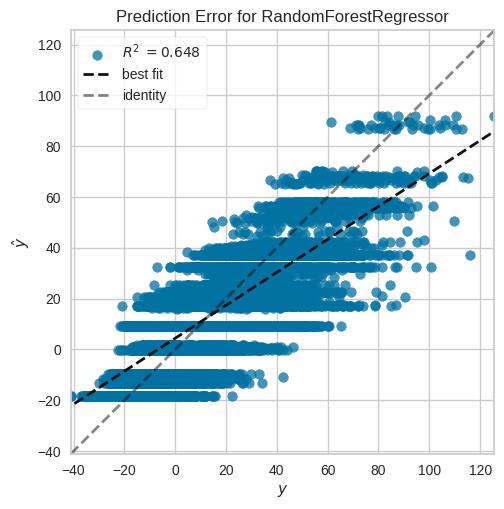

In [40]:
#ahora vamos a visualizar el resultado con
#el mejor ajuste es el de la línea negra, la q' mejor se ajusta a nuestro conjunto de datos y la obtuvimos pasando el parámetro de max_depth=5
#la línea de identidad es la ploma

from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test);




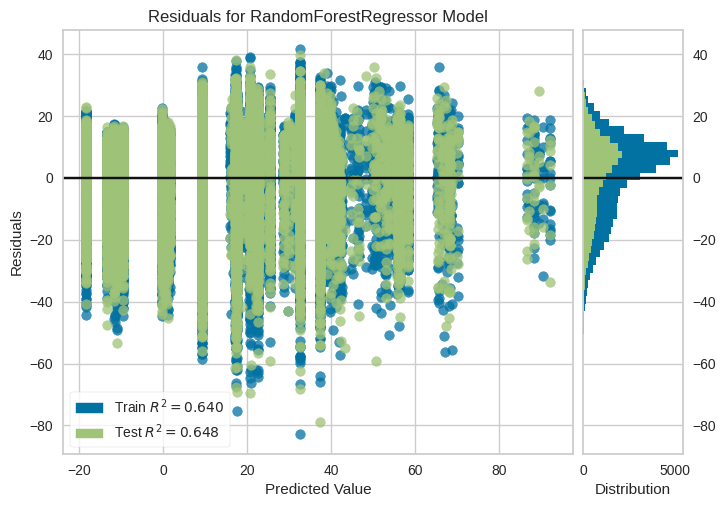

In [41]:
#ahora veremos los residuos, que es la diferencia entre mis observaciones, los datos de entrenamiento y la línea trazada por mi modelo
#en el curso análisis de regresión esta parte está mejor explicada
#la idea es que los datos de prueba tengan un comportamiento lo ,más similar posible a los obtenidos con el entrenamiento


from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test);


#por la distribución de colotres y los números se ve que el modelo estás generalizando bien (64%---> a casi el 65%)



In [ ]:
#s/e, no es suficiente... aplicaremos otras técnicas como la validación CRUZADA
#tomaremos diversas muestras del conjunto de datos para verificar si el comportam. se mantiene (o si el resultado es producto de la aleatoriedad del modelo)



## **Realizando cross validation**

In [42]:
#La idea es dividir el conjunto de datos en varias partes y tomar distintas secciones del conjunto para entrenar y probar
#Primero: kFold
#cv---> cross validation
#shuffle= True, o sea, todas las combinaciones posibles
#para scoring vamos a hacer un diccionario pero


from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

cv = KFold(n_splits= 5, shuffle= True, random_state= 42)
cv_results = cross_validate(modelo, X_train, y_train, scoring= scoring, cv= cv)
cv_results


#Resultados: en test RMSE se mantiene consistencia de -13... En test MAE, consistencia en -11 y en R2, consistencia entre 0.63 y 0.64


{'fit_time': array([6.83502221, 7.84608984, 8.57835412, 3.45030522, 2.55164957]),
 'score_time': array([0.21488094, 0.19228196, 0.09548545, 0.04661846, 0.04554462]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

# **Optimización de hiperparámetros**